In [1]:
%pylab inline
import cPickle
import numpy as np
import fool
import image_rec


Populating the interactive namespace from numpy and matplotlib
loading...

/usr/local/lib/python2.7/dist-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)
/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)



loading dummy...
neat setup...


/home/joel/code/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver
/home/joel/code/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for std::vector<float, std::allocator<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver


In [2]:
niche_matrix,niche_names=cPickle.load(open("nodecalc/niche_calc.pkl","rb"))
niche_names_nowordnet = [k[:50] for k in image_rec.labels]
data=[]

#data = cPickle.load(open("opt.pkl","rb"))
data = cPickle.load(open("no-opt.pkl","rb"))

In [3]:
elite_score,elite_map,evals,history,elite_extra,plots=data

loading...
loading dummy...
neat setup...
1000
0 n01440764 tench, Tinca tinca
[ 0.87238371  0.51779717  0.45631915  0.05102443  0.90856922  0.77245843]
building...
dcalc
dcalc complete
calling batch... 17
complete
[0.035979679226875304, 0.06378484722226858, 0.0712407591752708]
[ 0.          0.          0.1213308   0.63148426]
rendering images
verts (468, 3)
vertcols (468, 3)
faces (948, 3)
running image rec
no dnn
1 n01443537 goldfish, Carassius auratus
[ 0.93337959  0.99506086  0.96980906  0.9881655   0.95688045  0.89262569]
building...
dcalc
dcalc complete
calling batch... 15
complete
[0.29221546235494317, 0.393205084418878, 0.2485033141449094]
[ 0.          0.19329634  0.67540607  0.62342546]
rendering images
verts (766, 3)
vertcols (766, 3)
faces (1528, 3)
running image rec
no dnn
2 n01484850 great white shark, white shark, man-eate
[ 0.66864079  0.67276549  0.50634813  0.37288401  0.44440511  0.49801278]
building...
dcalc
dcalc complete
calling batch... 20
complete
[0.001498586451

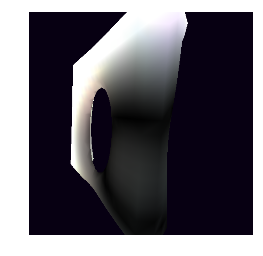

In [7]:
reload(fool)

print len(elite_map.keys())
#print len(niche_transform.rows.keys())
data_file=""
for niche in range(1000):
 n = niche
 if len(elite_map.keys())>1000:
    print "nichetransform"
    n = niche_transform.rows[niche]
 name = niche_names_nowordnet[niche]
 print n,name
 print elite_map[n]
 print elite_extra[n]
 save="archive/%d.ply" % niche
 imgs,res = fool.evaluate(elite_map[n],debug=True,save=save,dnn=False)
 for x in range(6):
     idx=n
     fool.save_render_plot([imgs[x],],str(idx),save="archive/%d-%d.png"%(niche,x),clean=True)
 data_file+=",".join([str(niche),name]+[str(k) for k in elite_extra[n]])+"\n"
open("archive/data.csv","w").write(data_file)

In [75]:
reload(fool)

loading...
loading dummy...
neat setup...


<module 'fool' from 'fool.py'>

(253, 1413, 6)
(253, 1000, 6)


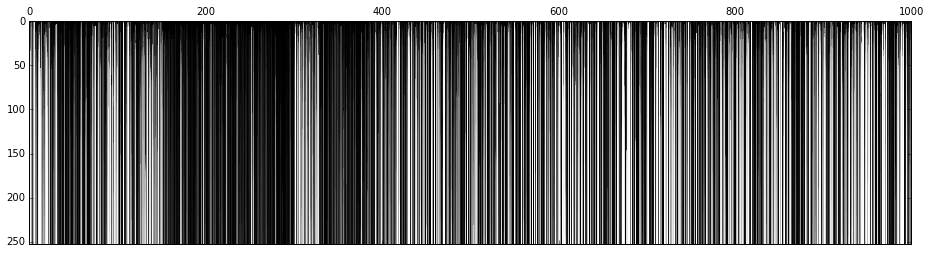

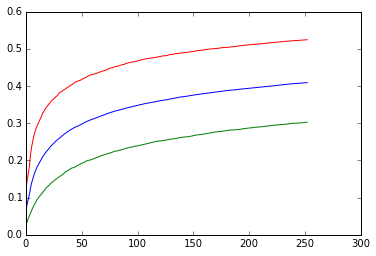

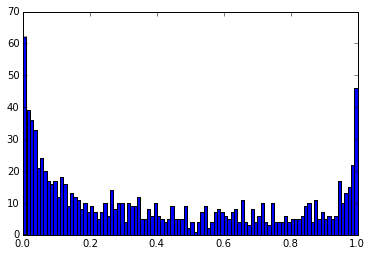

In [18]:
import niche_transform
reload(niche_transform)
from niche_transform import transform3

pnew = np.array(plots)
print pnew.shape
pnew = transform3(pnew)
print pnew.shape
plt.gray()
meanscores = pnew.mean(2)
minscores = pnew.min(2)
maxscores = pnew.max(2)
plt.matshow(meanscores)
plt.figure()
plt.plot(meanscores.mean(axis=1))
plt.plot(minscores.mean(axis=1))
plt.plot(maxscores.mean(axis=1))
plt.figure()
plt.hist(meanscores[-1],bins=100)

final_mean = zip(meanscores[-1],range(1000))
final_mean.sort()

eligible = final_mean[-160:]



In [50]:
print niche_names_noword[:20]

NameError: name 'niche_names_noword' is not defined

75604
129766
n07768694 pomegranate
(1.5908738439312764e-17, {'source_niche': 1044, 'img_score': array([ 0.00223158,  0.00244877,  0.0020656 ,  0.00160155,  0.00138262,
        0.00063648]), 'new_score': 1.5908738439312764e-17, 'target_niche': 2, 'old_score': 9.5094187685164129e-19}, (<_MultiNEAT.Genome object at 0x7efcbb1f0db8>, <_MultiNEAT.Genome object at 0x7efcbbe10af8>))
building...
dcalc
dcalc complete
calling batch... 10
complete
[0.3292307679075748, 0.010449317283928394, 0.13709541084244847]
[ 0.89927824  0.95318373  0.21325823  0.03801362]
rendering images
verts (6, 3)
vertcols (6, 3)
faces (8, 3)
running image rec
[ 0.00223158  0.00244877  0.0020656   0.00160155  0.00138262  0.00063648]
(1.5908738439312764e-17, {'source_niche': 1044, 'img_score': array([ 0.00223158,  0.00244877,  0.0020656 ,  0.00160155,  0.00138262,
        0.00063648]), 'new_score': 1.5908738439312764e-17, 'target_niche': 2, 'old_score': 9.5094187685164129e-19}, (<_MultiNEAT.Genome object at 0x7efcbb1f0db8>,

KeyboardInterrupt: 

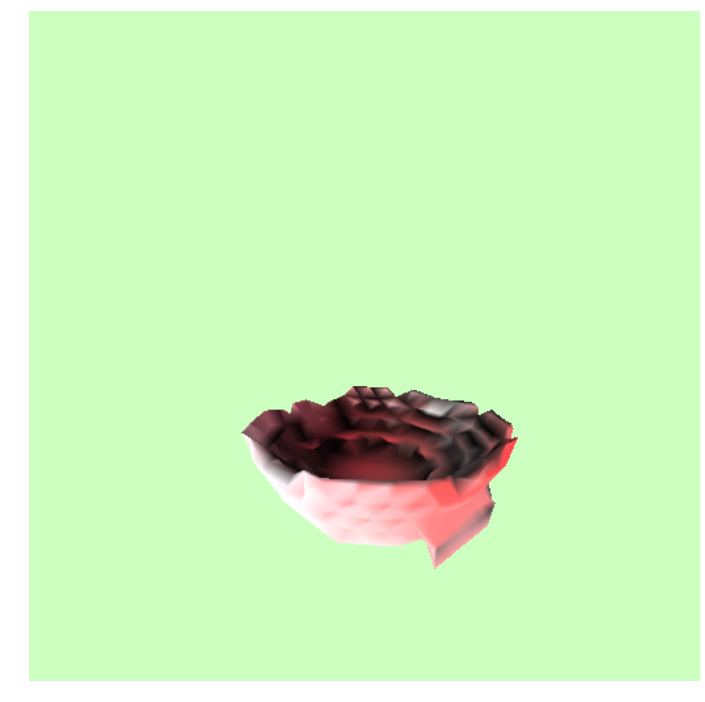

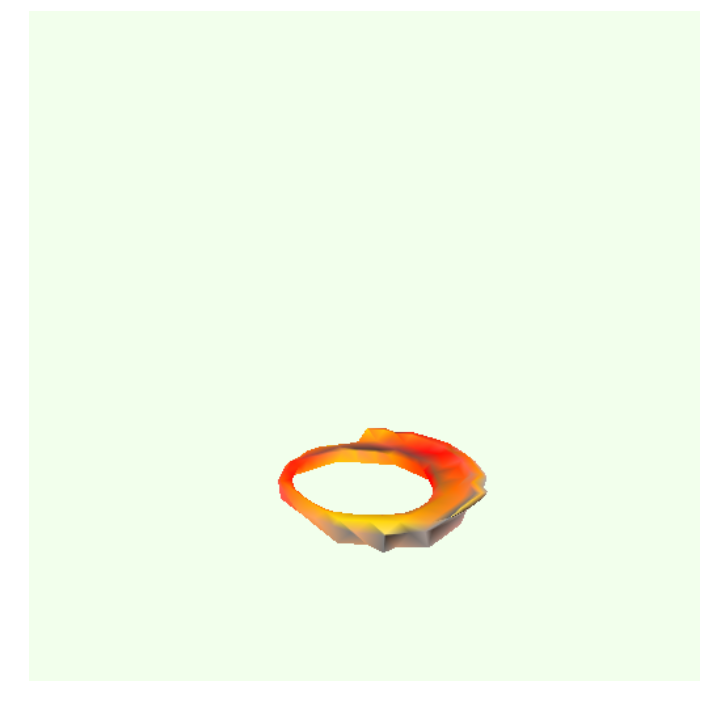

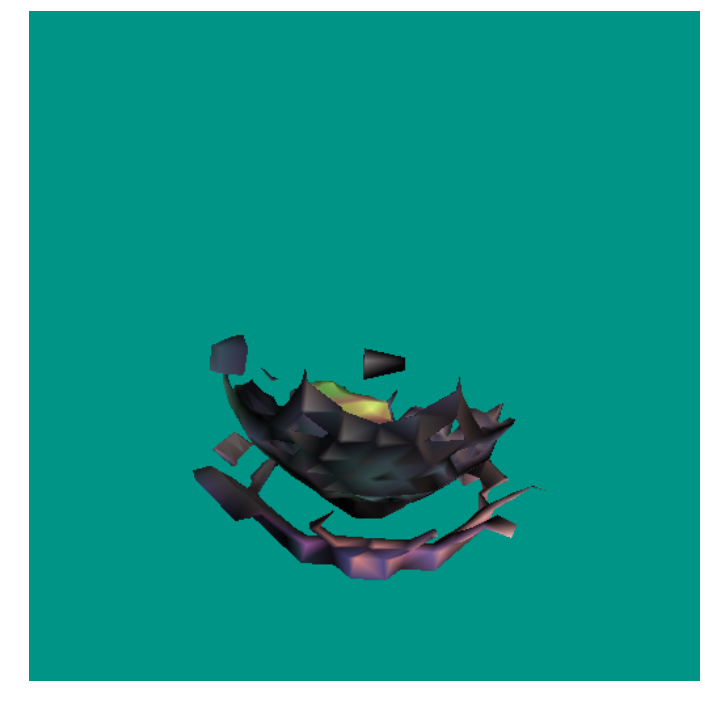

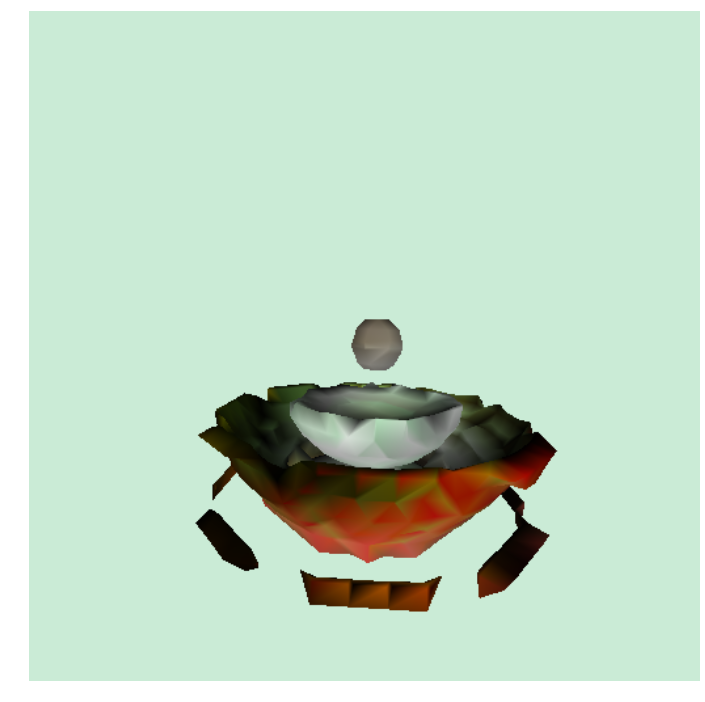

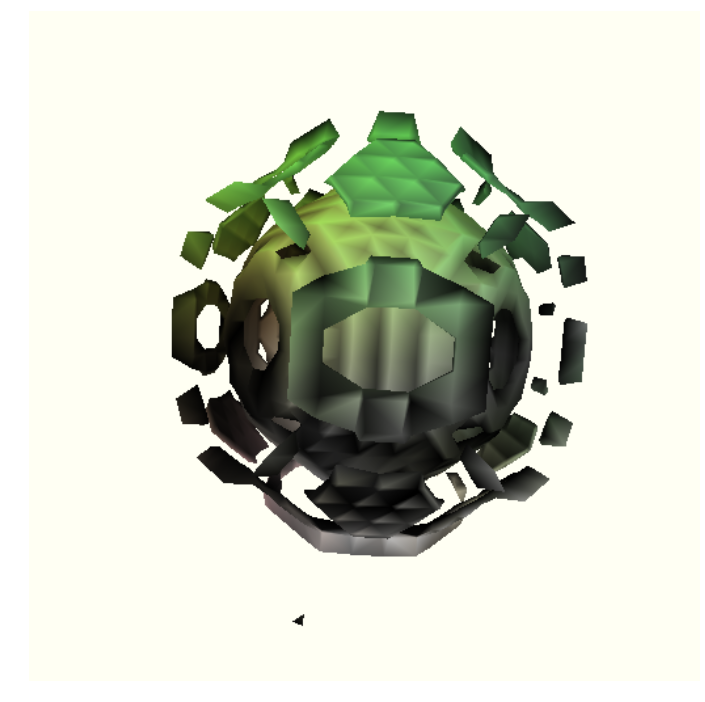

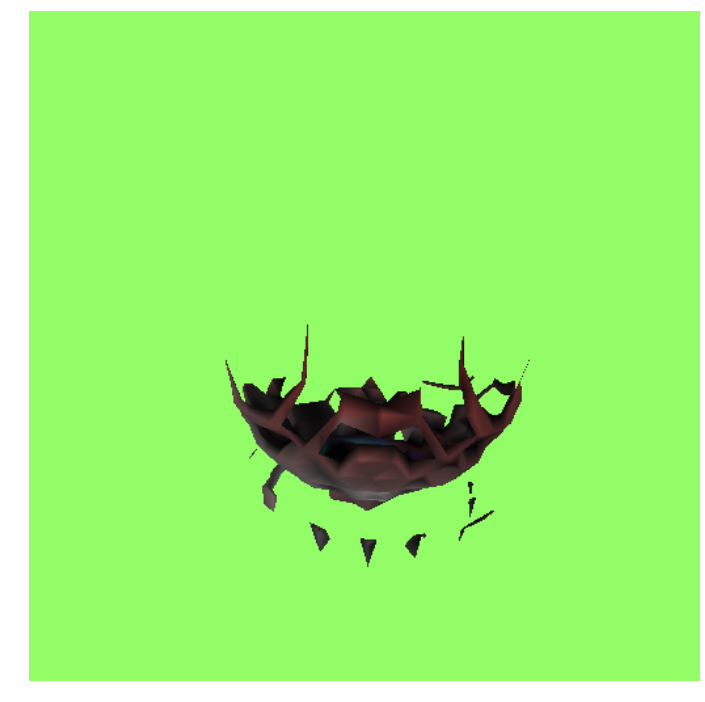

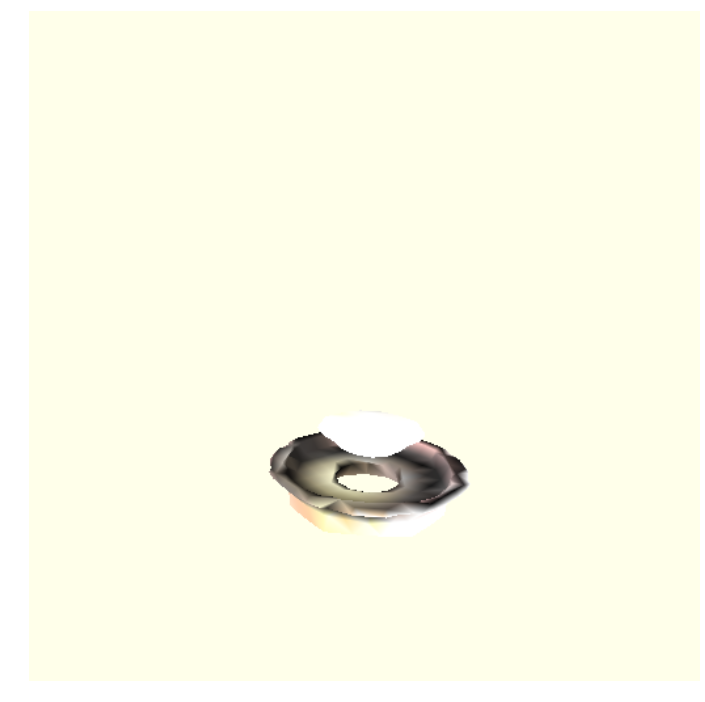

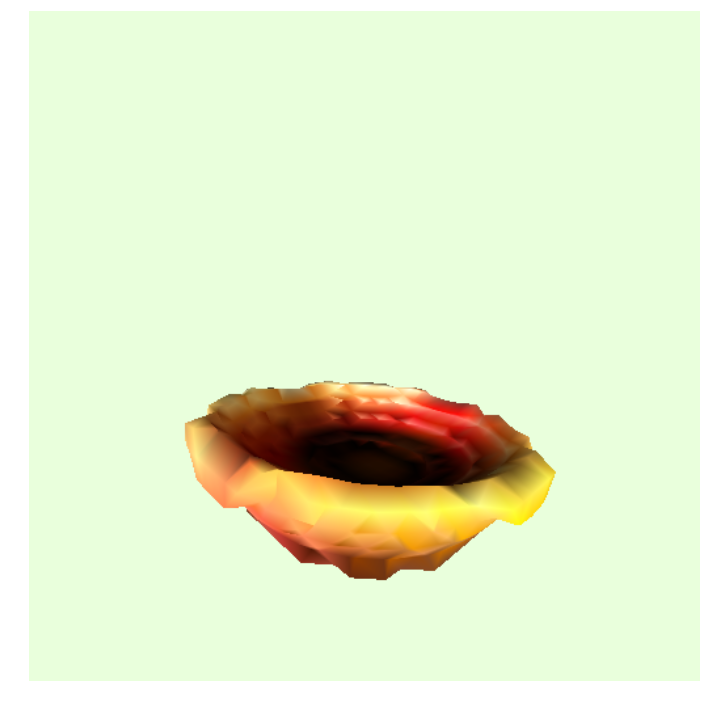

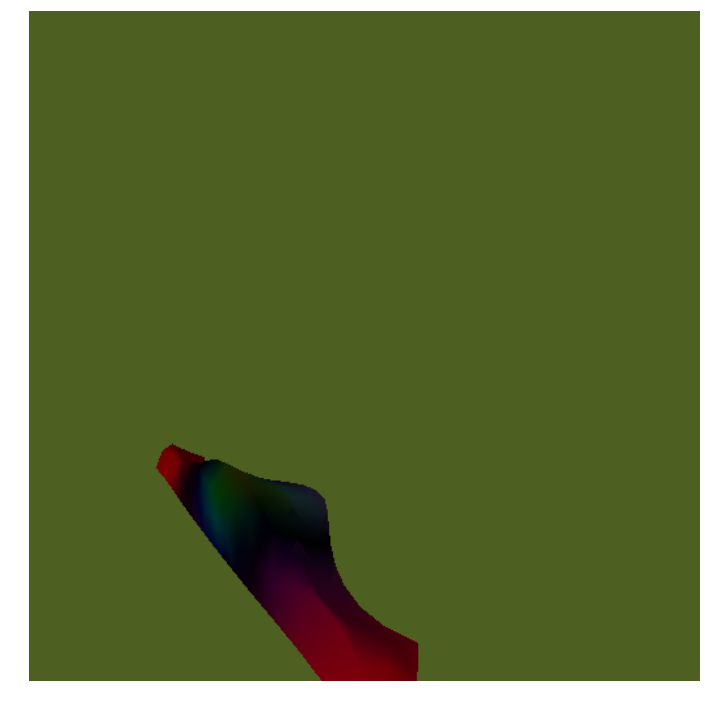

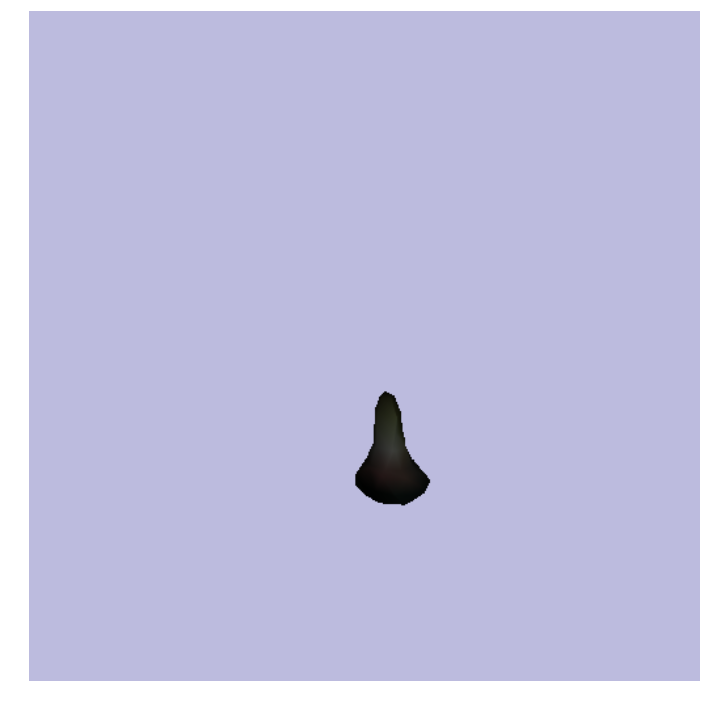

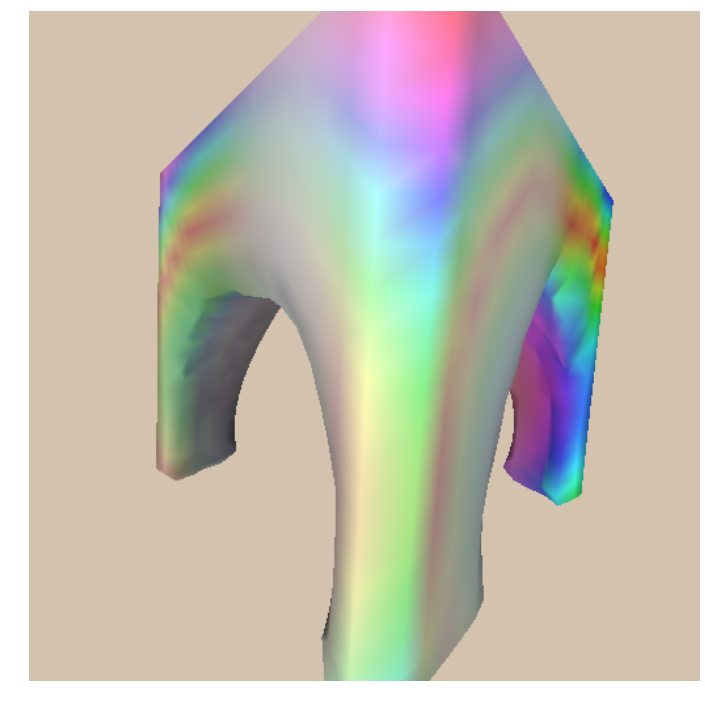

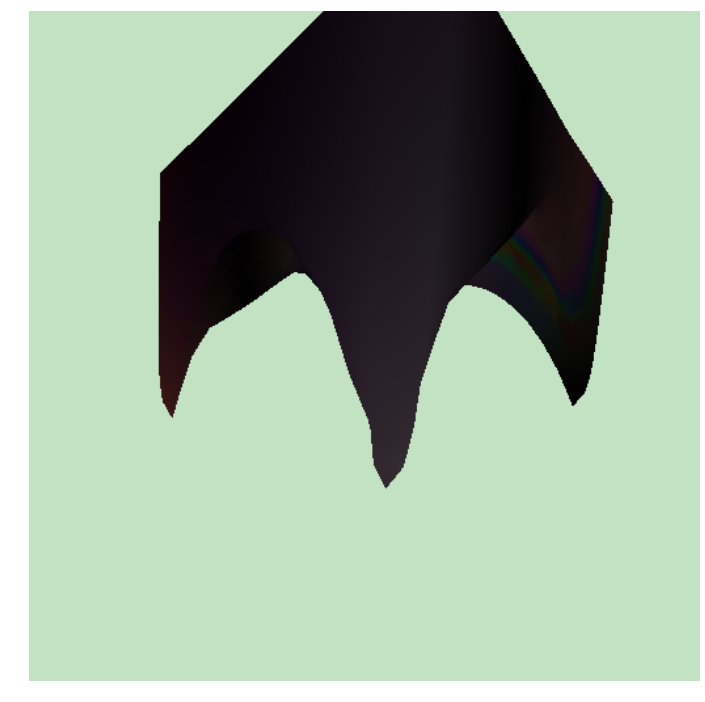

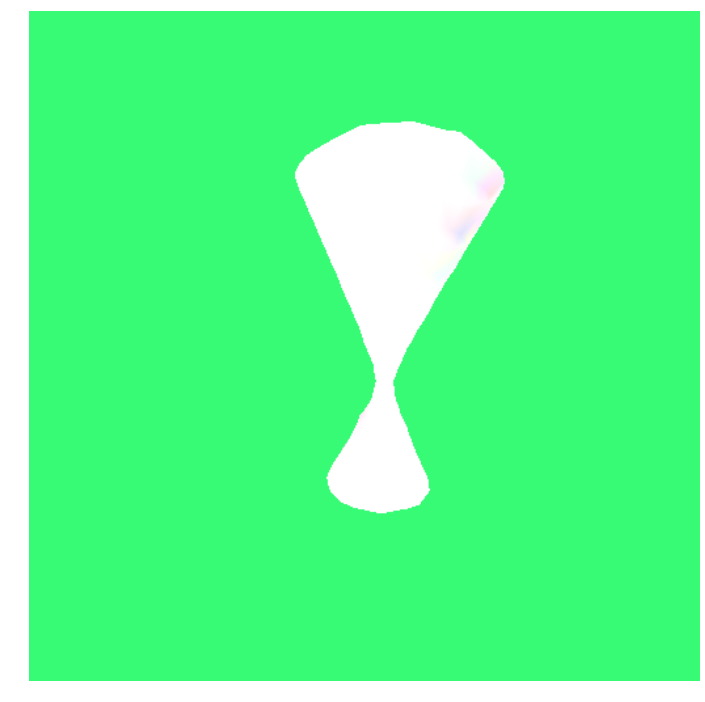

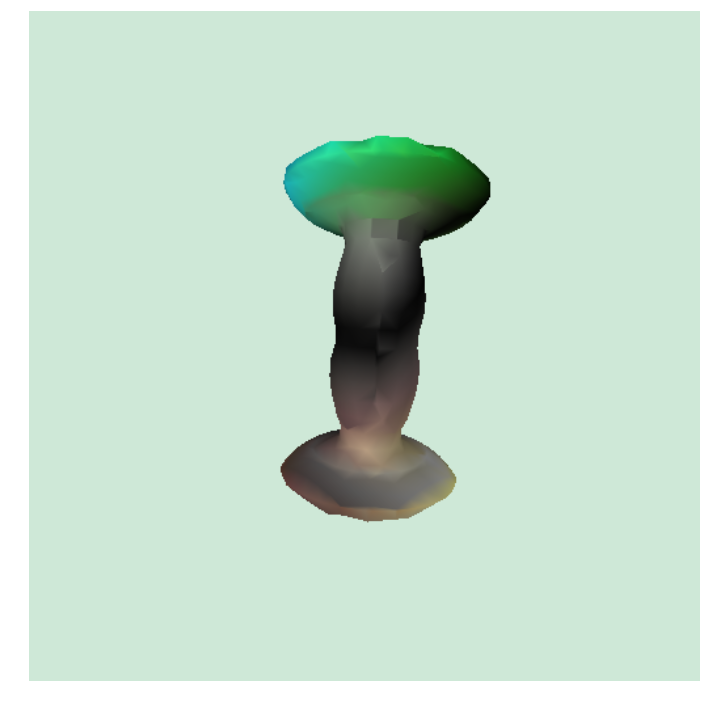

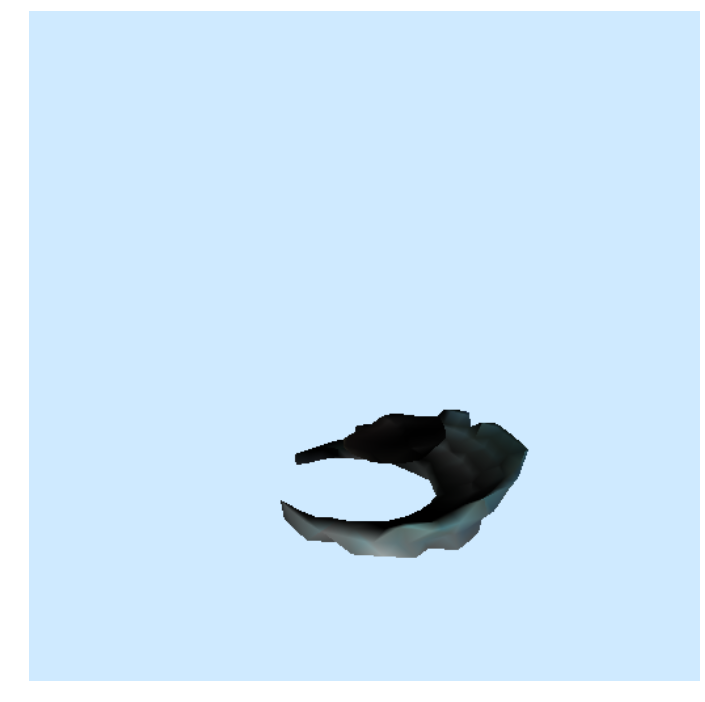

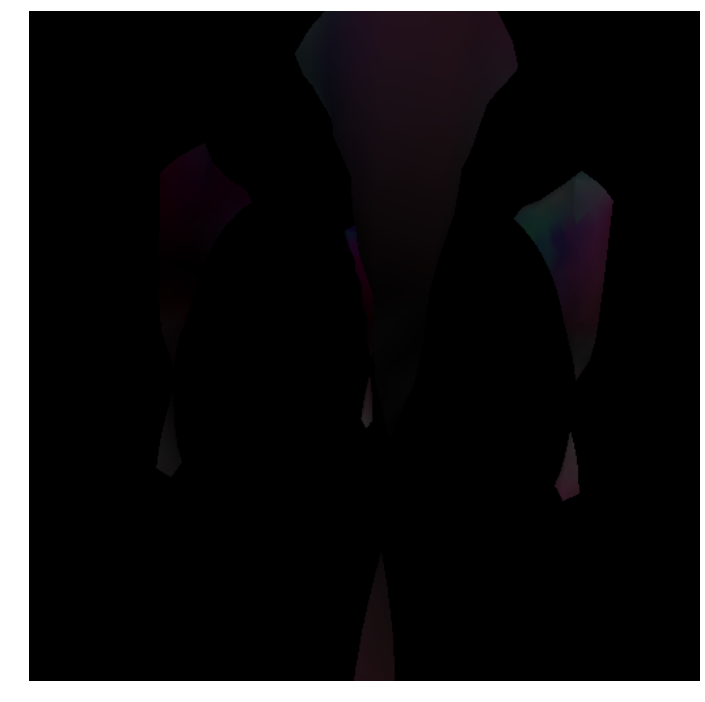

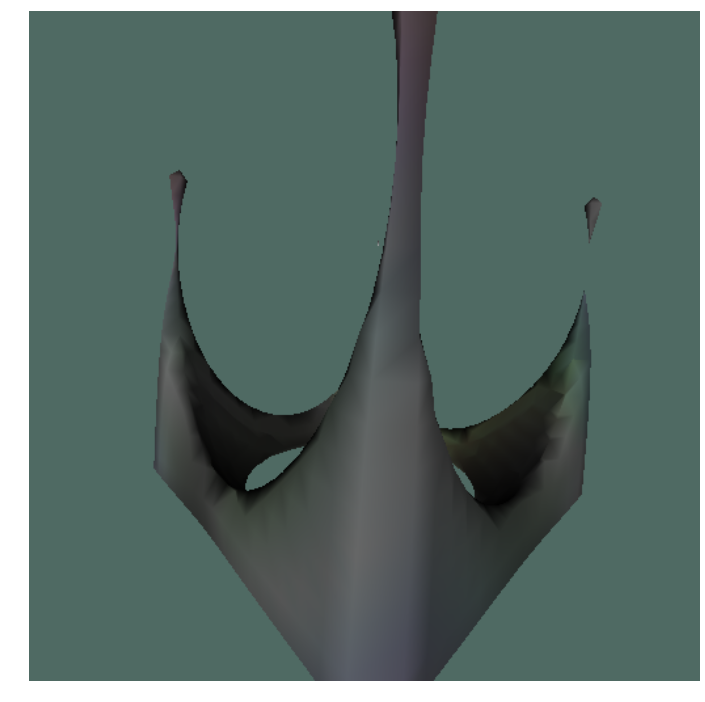

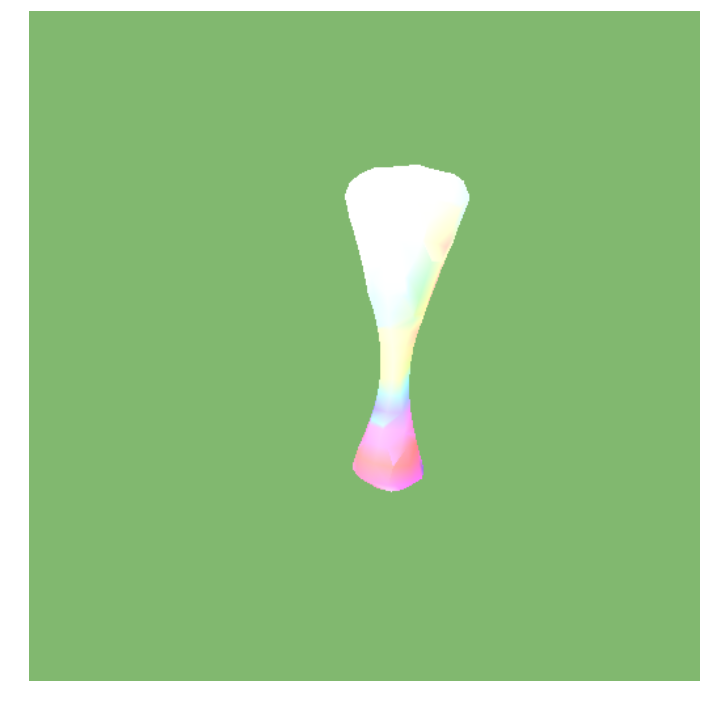

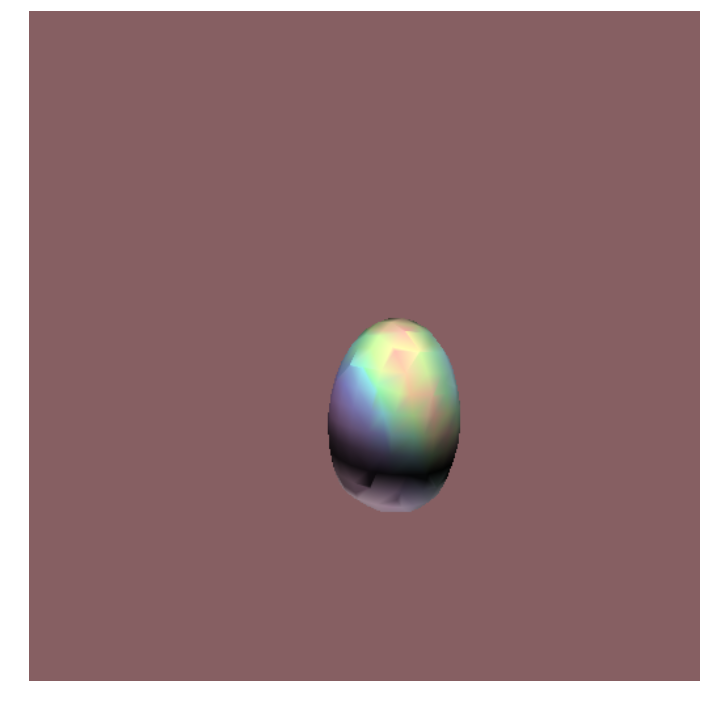

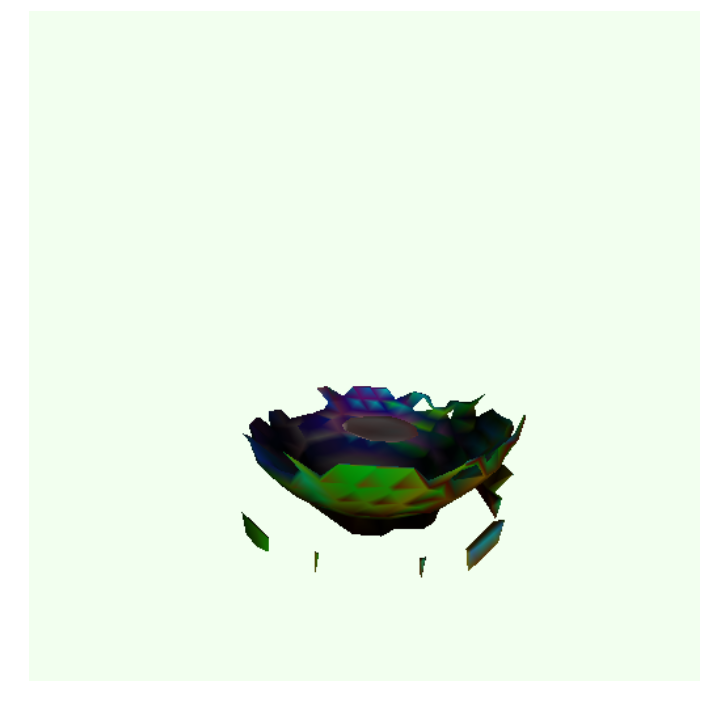

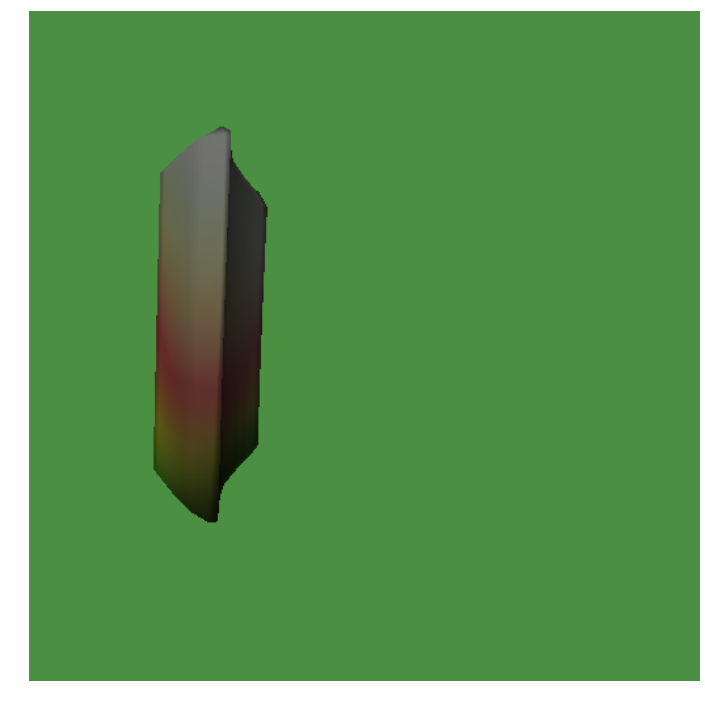

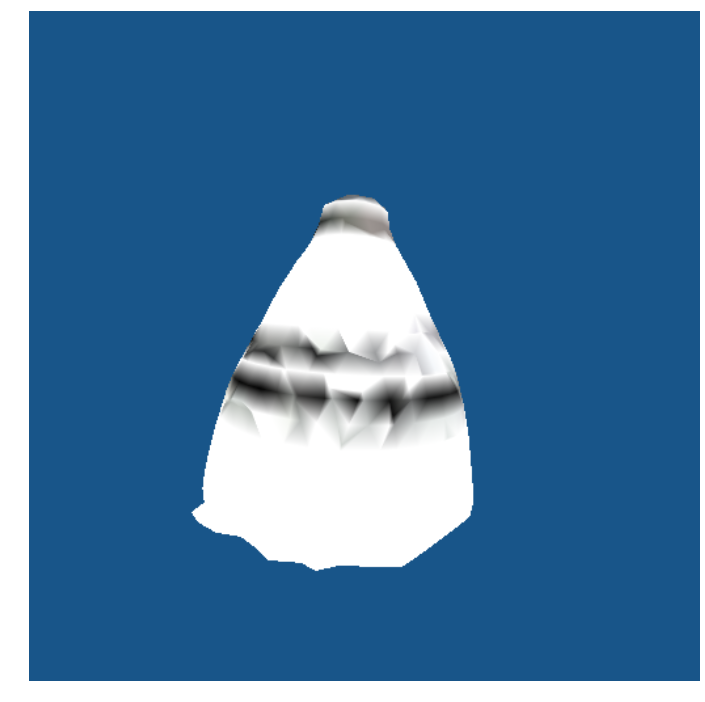

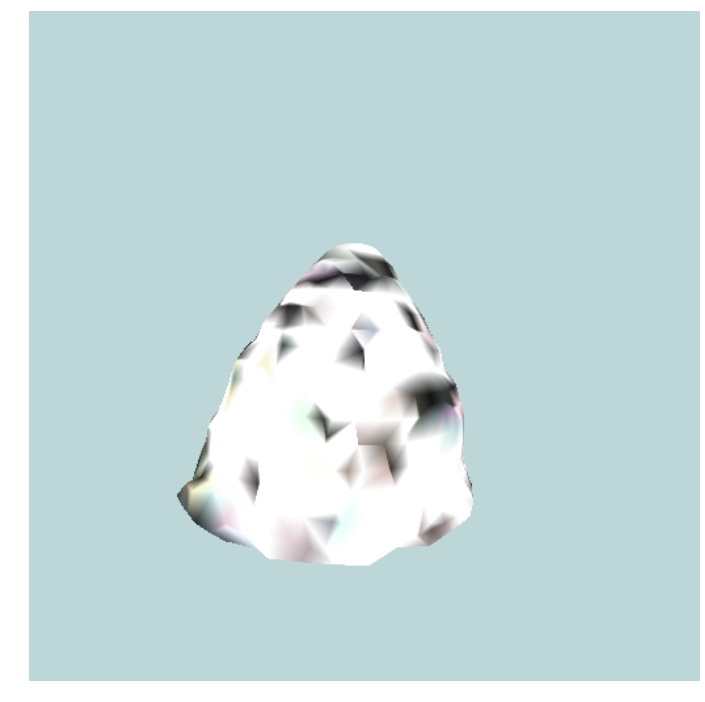

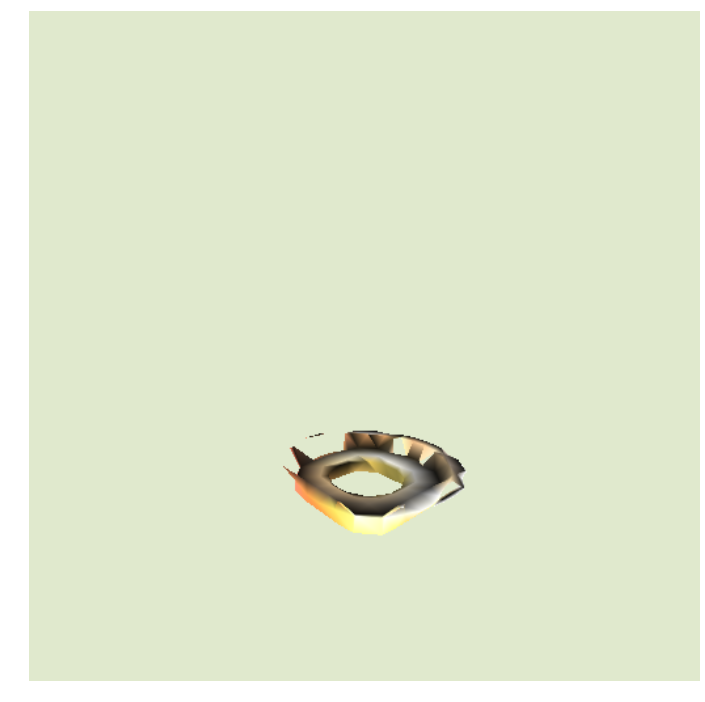

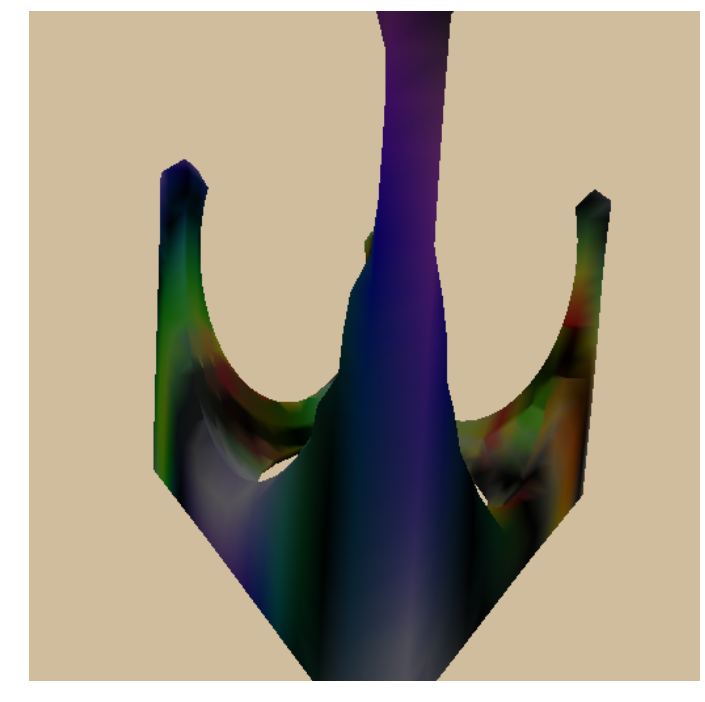

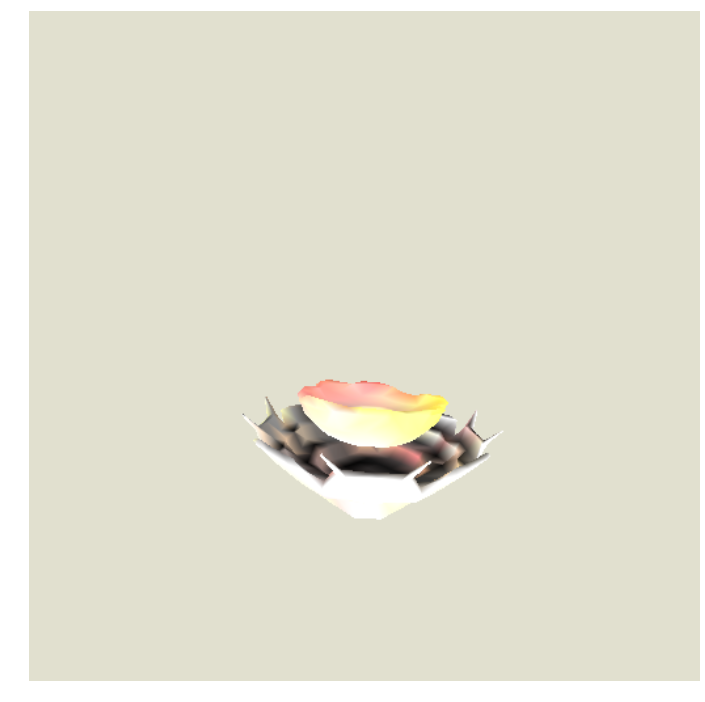

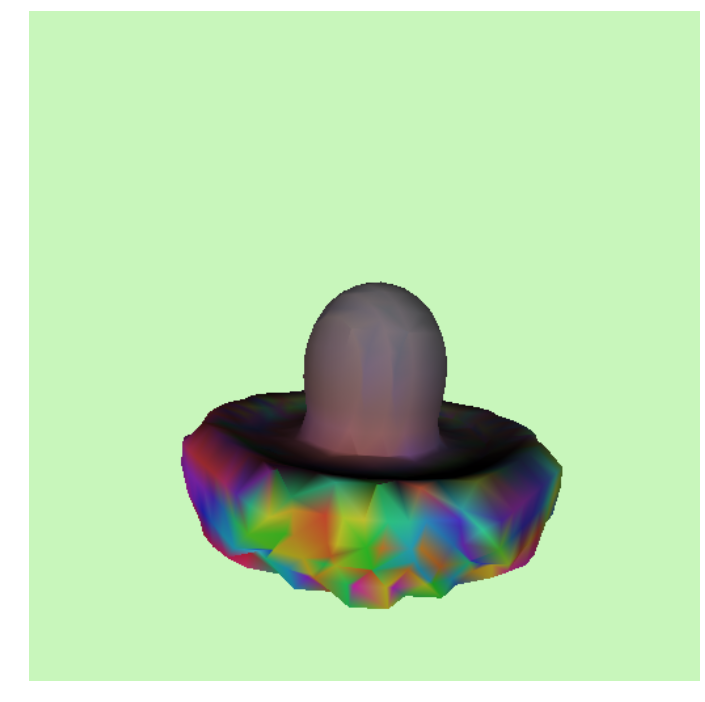

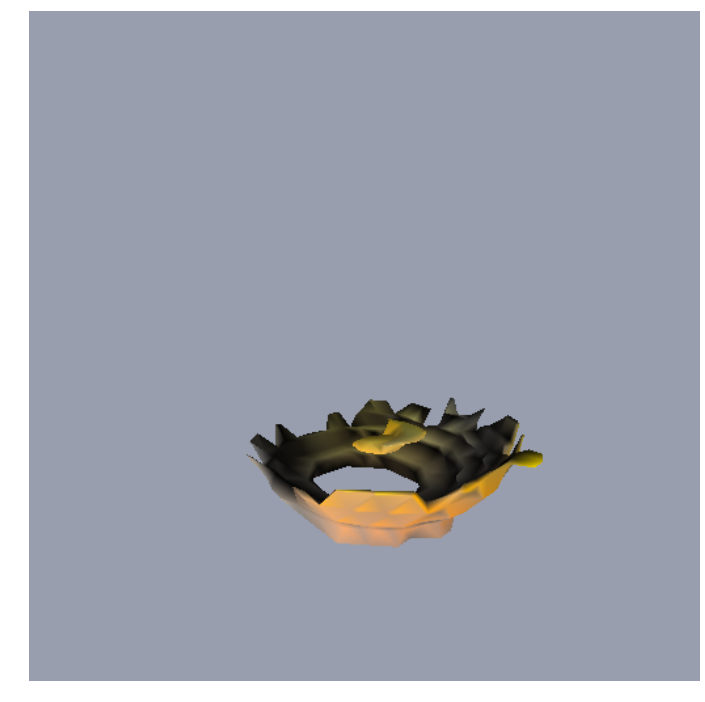

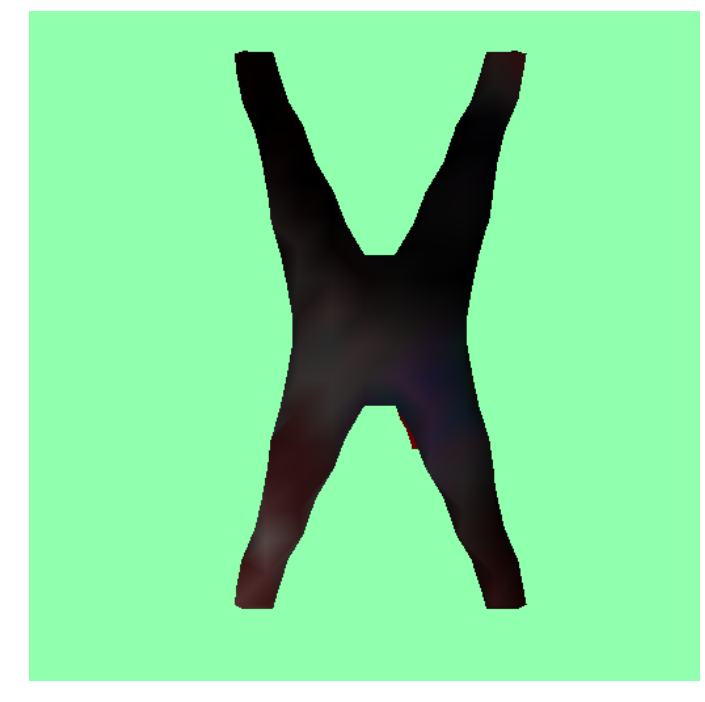

In [21]:
print len(history.nodes())
print len(history.edges())

def do_niche(niche,render=False):
 to_find = niche_transform.rows[niche]
 print niche_names_nowordnet[niche]

 records=[]
 for edge in history.edges():
    data = history.get_edge_data(edge[0],edge[1])[0]
    if data['target_niche']==to_find:
       records.append((data['new_score'],data,edge)) 
 records.sort()
 plt.figure(figsize=(12,12))

 idx=0
 for record in records:
  print record
  save=None
  if render:
   save="out/seq%d-%d.ply"%(niche,idx)
  
  imgs,res = fool.evaluate(record[-1][-1],debug=True,save=save)
  classification = res[:,niche]
  record[1]['img_score'] = classification
  print classification
  if render:
    for x in range(6):
     fool.save_render_plot([imgs[x],],str(idx),save="out/seq%d-%d-%d.png"%(niche,idx,x),clean=True)
  idx+=1
 if render:
  cPickle.dump(records,open("out/seq%d.pkl"%(niche),"w"))
    
niche = 80
for niche in eligible:
 niche=niche[1]
 do_niche(niche,render=True)


**Survey-making code**

6 n01498041 stingray
135
858 n04435653 tile roof
0
skipping 858
606 n03584829 iron, smoothing iron
269
920 n06874185 traffic light, traffic signal, stoplight
0
skipping 920
814 n04273569 speedboat
388
570 n03424325 gasmask, respirator, gas helmet
217
429 n02799071 baseball
95
419 n02786058 Band Aid
187
678 n03814639 neck brace
0
skipping 678
629 n03676483 lipstick, lip rouge
71
672 n03792972 mountain tent
92
731 n03970156 plunger, plumber's helper
17
950 n07747607 orange
70
666 n03786901 mortar
48
430 n02802426 basketball
159
855 n04423845 thimble
0
skipping 855
900 n04562935 water tower
223
849 n04398044 teapot
49
711 n03916031 perfume, essence
12
755 n04044716 radio telescope, radio reflector
81
989 n12620546 hip, rose hip, rosehip
69
455 n02877765 bottlecap
65
673 n03793489 mouse, computer mouse
103
633 n03692522 loupe, jeweler's loupe
0
skipping 633
469 n02939185 caldron, cauldron
54
572 n03443371 goblet
10
81 n01796340 ptarmigan
15
615 n03623198 knee pad
0
skipping 615
90 n0182054

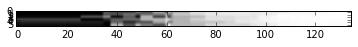

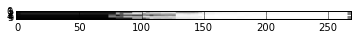

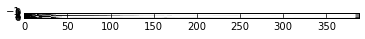

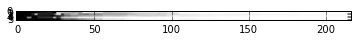

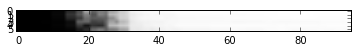

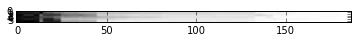

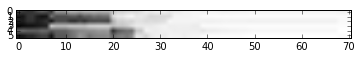

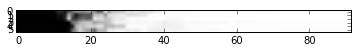

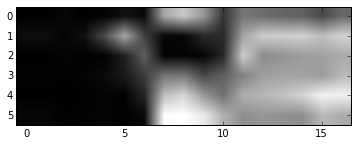

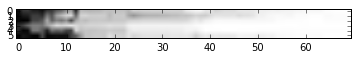

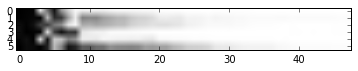

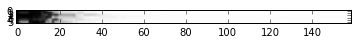

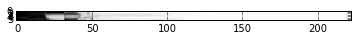

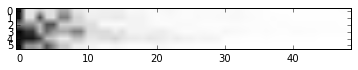

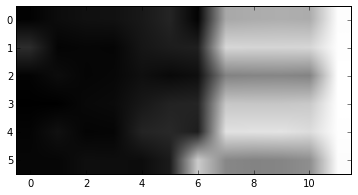

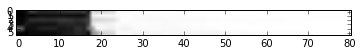

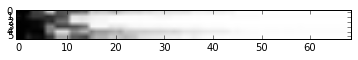

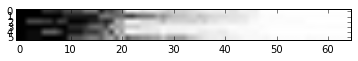

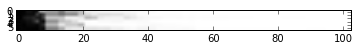

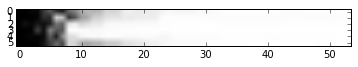

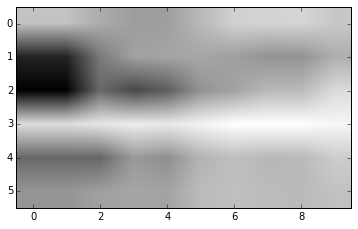

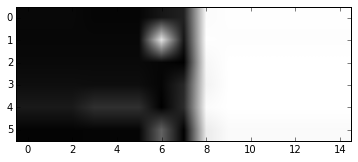

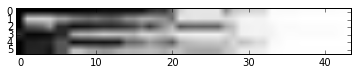

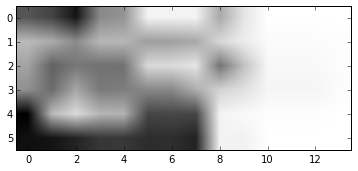

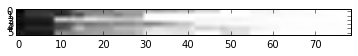

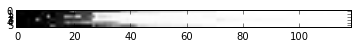

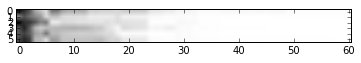

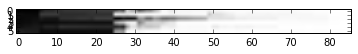

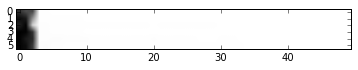

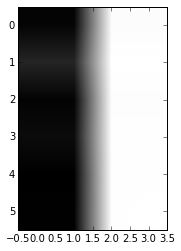

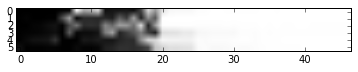

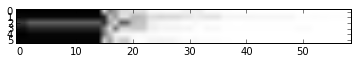

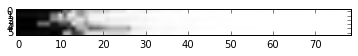

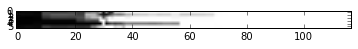

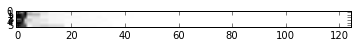

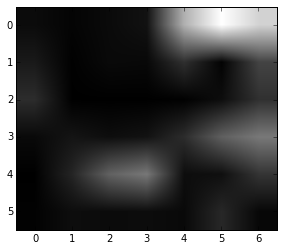

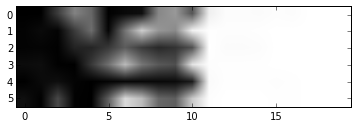

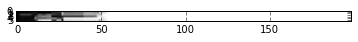

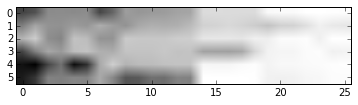

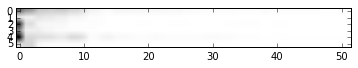

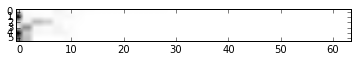

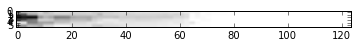

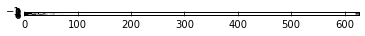

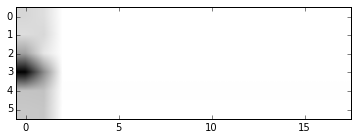

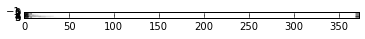

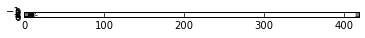

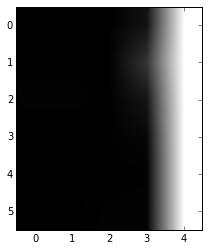

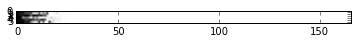

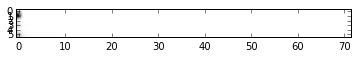

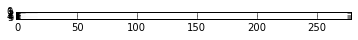

In [63]:
def closest_idx(array,val):
    dist_array = -abs(array-val)
    idx = dist_array.argmax()
    idx_t = numpy.unravel_index(idx,dist_array.shape)
    return idx_t #,array[idx_t]
    
import glob, os
out_string=""
for niche in eligible[-62:]:
    num = niche[1]
    print num,niche_names_nowordnet[num]
    globstr = "out/seq%d-*.pkl"%num
    records= cPickle.load(open(glob.glob(globstr)[0]))
    print len(records)
    if len(records)==0:
        print 'skipping', num
        continue
    
    ratings = numpy.zeros((len(records),6))
    idx=0
    for record in records:
        ratings[idx,:]=record[1]['img_score']
        idx+=1
    plt.figure()
    plt.imshow(ratings.T)
    plt.figure()
    #plt.hist(ratings.ravel(),bins=50)
    
    low_img = closest_idx(ratings,0.2)
    high_img = closest_idx(ratings,1.0)
    label = niche_names_nowordnet[num]
    low_img = "seq%d-%d-%d.png" % (num,low_img[0],low_img[1])
    high_img = "seq%d-%d-%d.png" % (num,high_img[0],high_img[1])
    os.system("cp out/%s saved/%s" % (low_img,low_img))
    os.system("cp out/%s saved/%s" % (high_img,high_img))
    
    out_string+= low_img+","+high_img+",'"+label+"'\n"
    
print out_string
    
        

In [18]:
import networkx as nx
print len(history.nodes())
node = history.nodes()[-1]

anc= nx.ancestors(history,node)
dec= nx.descendants(history,node)

in_edge=history.in_edges([node])
out_edge=history.out_edges([node])

in_nodes = [(k[0],history.get_edge_data(k[0],k[1])) for k in in_edge]
out_nodes = [k[1] for k in out_edge]

print node
print in_nodes,out_nodes

subg = history.subgraph([node]+list(anc)+list(dec))
subg = history.subgraph([node]+in_nodes+out_nodes)

plt.figure(figsize=(14,14))
nx.draw(subg)

75604
[(<_MultiNEAT.Genome object at 0x7f4ec7ad1578>, {0: {'source_niche': 304, 'new_score': 0.097814814025784735, 'target_niche': 304, 'old_score': 0.09739374159177798}})] [<_MultiNEAT.Genome object at 0x7f4ec8537db8>]


TypeError: not all arguments converted during string formatting

In [4]:


def get_complexity(genomes):
    links=[]
    nodes=[]
    for key in genomes.keys():
        links.append(genomes[key].NumLinks())
        nodes.append(genomes[key].NumNeurons())
    return float(sum(links))/len(links),float(sum(nodes))/len(nodes),max(nodes)

for k in range(63):
    genomes = data[k][1]                     
    print get_complexity(genomes)

(53.394904458598724, 16.440905874026893, 30)
(53.71479122434536, 16.504600141542817, 30)
(54.05590941259731, 16.574663835810334, 30)
(54.288039631988674, 16.6206652512385, 30)
(54.72823779193206, 16.685774946921445, 30)
(55.13305024769993, 16.767869780608635, 30)
(55.481245576786975, 16.83581033262562, 30)
(55.825902335456476, 16.88818117480538, 30)
(56.095541401273884, 16.94762915782024, 30)
(56.49115357395612, 17.002123142250532, 30)
(56.84359518754423, 17.066525123849964, 30)
(57.1104033970276, 17.116065109695683, 31)
(57.43595187544232, 17.172682236376502, 31)
(57.711960368011326, 17.21868365180467, 31)
(57.93701344656758, 17.24769992922859, 31)
(58.13871196036801, 17.27034677990092, 31)
(58.38358103326256, 17.318471337579616, 31)
(58.725406935598016, 17.389242745930645, 31)
(58.924982307147914, 17.425336164189666, 32)
(59.27883934890304, 17.48690728945506, 32)
(59.539278131634816, 17.553432413305025, 32)
(59.939844302901626, 17.61995753715499, 32)
(60.13729653220099, 17.6560509554

IndexError: list index out of range

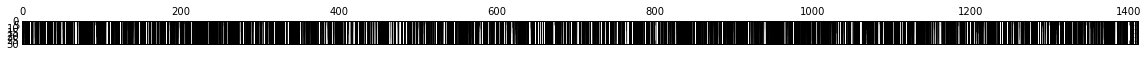

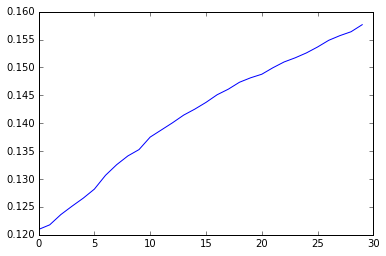

In [6]:
gray()
figure(figsize=(20,20))
matshow(score_array,fignum=0)
figure()


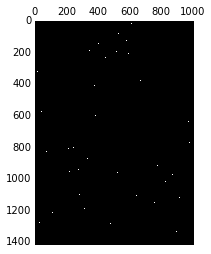

In [12]:
matshow(niche_matrix,fignum=0)

In [10]:



import image_rec
for score in scores[-1:]:
 sort_list=zip(score,range(score.shape[0]))
 sort_list.sort(reverse=True)
 for k in sort_list[:50]:
  print k,niche_names[k[1]] #image_rec.labels[k[1]][:30]
 #raw_input()

(0.99999880790763029, 1400) instrument.n.01
(0.99999880790763029, 1318) timepiece.n.01
(0.99999880790763029, 1288) device.n.01
(0.99999880790763029, 627) measuring_instrument.n.01
(0.99999880790763029, 337) hourglass.n.01
(0.99881973497429422, 524) airship.n.01
(0.99787366452453297, 695) balloon.n.01
(0.97591958058285522, 1009) pick.n.05
(0.97528349276938253, 226) pinwheel.n.02
(0.96983937129395648, 1240) parachute.n.01
(0.94590148334683088, 1209) plunger.n.03
(0.93927904662968975, 111) tennis_ball.n.01
(0.92193451387645409, 1155) nipple.n.02
(0.92193451387645409, 419) cap.n.02
(0.92193451387645409, 307) top.n.09
(0.91749812012083376, 464) goblet.n.01
(0.91749812012083376, 414) glass.n.02
(0.89354245309768421, 921) buckeye.n.01
(0.89354245309768421, 142) seed.n.01
(0.88701509474777296, 1060) coelenterate.n.01
(0.88701509474777296, 217) jellyfish.n.02
(0.88084141587108455, 655) conch.n.01
(0.87932412495495316, 703) spotlight.n.02
(0.87932412495495316, 30) source_of_illumination.n.01
(0.

In [7]:
print scores[0][1]

5.7102576001e-09


In [6]:
data = cPickle.load(open("nov2.pkl","rb"))

In [7]:
garchive,archive,genomes,behaviors = data
print len(genomes)

500


building...
dcalc
dcalc complete
calling batch... 12
complete
[0.0, 0.0, 0.1342645572964102]
[ 0.  0.  0.  0.]
rendering images
verts (670, 3)
vertcols (670, 3)
faces (1336, 3)
running image rec
building...
dcalc
dcalc complete
calling batch... 12
complete
[0.0, 0.0, 0.1342645572964102]
[ 0.  0.  0.  0.]
rendering images
verts (670, 3)
vertcols (670, 3)
faces (1336, 3)
running image rec
building...
dcalc
dcalc complete
calling batch... 13
complete
[0.13858907795511186, 0.1121141211129725, 0.011020375834777952]
[ 0.  0.  0.  0.]
rendering images
verts (354, 3)
vertcols (354, 3)
faces (704, 3)
running image rec
building...
dcalc
dcalc complete
calling batch... 12
complete
[0.12436866089701654, 0.08439529580064119, 0.11951054544188082]
[ 0.  0.  0.  0.]
rendering images
verts (298, 3)
vertcols (298, 3)
faces (592, 3)
running image rec
building...
dcalc
dcalc complete
calling batch... 12
complete
[0.12436866089701654, 0.08439529580064119, 0.11951054544188082]
[ 0.  0.  0.  0.]
rendering im

KeyboardInterrupt: 

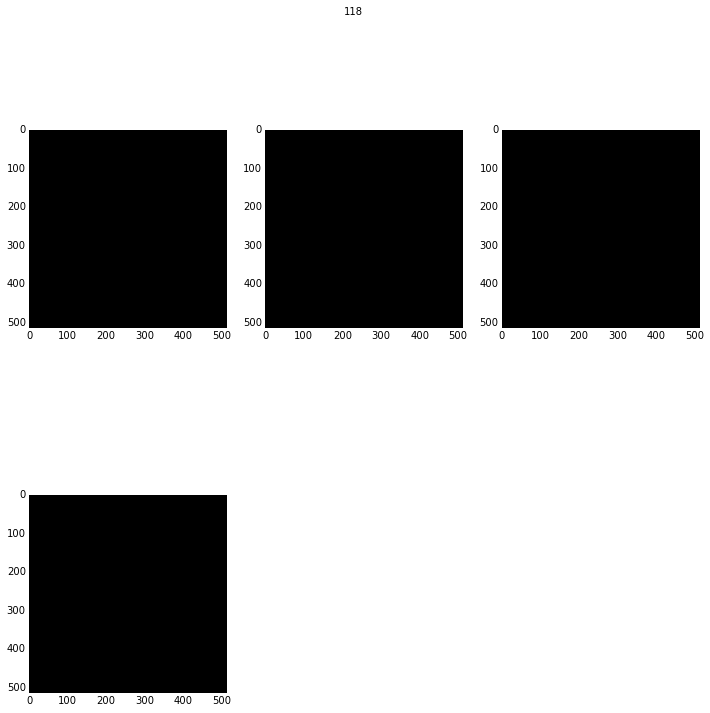

In [12]:
plt.figure(figsize=(12,12))
for idx in range(len(genomes)):
 imgs,res = fool.evaluate(genomes[idx],debug=True,save="out/nov%d.ply"%idx)
 fool.save_render_plot(imgs,str(idx),save="out/nov%d.png"%idx)

(500, 2048)


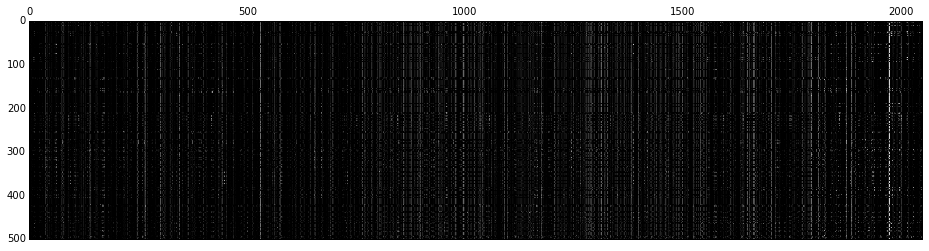

In [11]:
beh = np.array(behaviors)
plt.gray()
print beh.shape
plt.figure(figsize=(15,15))
plt.matshow(beh)

In [9]:
print beh.max()

0.268695


In [64]:
print beh.min()

NameError: name 'beh' is not defined

[(0.0012932618556078523, 547),
 (0.0014783558096193399, 334),
 (0.0016395780451906223, 634),
 (0.0016713097963171701, 201),
 (0.0019036043959204108, 106),
 (0.0019086109581015382, 571),
 (0.0021500373065161207, 336),
 (0.0021850057043290385, 874),
 (0.0021880212589167058, 335),
 (0.0022159227276764191, 603),
 (0.0023480635524416962, 192),
 (0.0023931976757012308, 860),
 (0.0025765087484614924, 675),
 (0.0026268930814694613, 175),
 (0.002636025077663362, 193),
 (0.0027931184546711543, 717),
 (0.0028722050095287464, 102),
 (0.0030654568884832165, 228),
 (0.0031767821637913585, 288),
 (0.0036672426601095745, 182),
 (0.0039275220672910409, 454),
 (0.004470116226002574, 624),
 (0.0052039076496536536, 800),
 (0.0052538232994265854, 829),
 (0.005484728530670206, 821),
 (0.005595778813585639, 660),
 (0.0057236551074311137, 582),
 (0.0057666377009203034, 525),
 (0.0060007825183371706, 281),
 (0.0060221693711355329, 918),
 (0.0061226768690782292, 959),
 (0.006220414036458048, 289),
 (0.006334998